In [2]:
import pandas as pd
import xgboost as xgb
import time
import numpy as np

In [3]:
fly = pd.read_csv('Aviation_accident.encoded.csv', index_col='Unnamed: 0')

In [4]:
fly

,Event.Date,Injury.Severity_Fatal,Injury.Severity_Incident,Injury.Severity_Minor,Injury.Severity_Non-Fatal,Injury.Severity_Serious,Injury.Severity_Unavailable,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,...,Broad.phase.of.flight_Cruise,Broad.phase.of.flight_Descent,Broad.phase.of.flight_Go-around,Broad.phase.of.flight_Landing,Broad.phase.of.flight_Maneuvering,Broad.phase.of.flight_Other,Broad.phase.of.flight_Standing,Broad.phase.of.flight_Takeoff,Broad.phase.of.flight_Taxi,Broad.phase.of.flight_unknown
0,1948-10-24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1962-07-19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1974-08-30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1977-06-19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1979-08-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84171,2022-12-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84172,2022-12-14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84173,2022-12-15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84174,2022-12-16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
y = fly['Injury.Severity_Fatal']
x = fly.drop(['Event.Date', 'Injury.Severity_Fatal', 'Injury.Severity_Incident',
       'Injury.Severity_Minor', 'Injury.Severity_Non-Fatal',
       'Injury.Severity_Serious', 'Injury.Severity_Unavailable'], axis =1)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
xg_reg = xg_reg = xgb.XGBRegressor(random_state=123, n_estimators=5, max_depth=7)

In [8]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [9]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [10]:
y_pred = xg_reg.predict(x_test)

In [11]:
y_pred

array([0.08426826, 0.08426826, 0.91590124, ..., 0.08426826, 0.08426826,
       0.91590124], dtype=float32)

In [12]:
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
def report_metrics(y_test, y_pred):
    metrics_dict = {}
    for metric in [mean_absolute_error, mean_squared_error, r2_score]:
        metrics_dict[metric.__name__] = metric(y_true=y_test, y_pred=y_pred)
    return metrics_dict

In [14]:
report_metrics(y_test=y_test, y_pred=y_pred)

{'mean_absolute_error': 0.08473888404152262,
 'mean_squared_error': 0.007563327082372923,
 'r2_score': 0.952093811289879}

In [15]:
np.mean((y_pred - y_test)**2)

0.007563327082372923

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

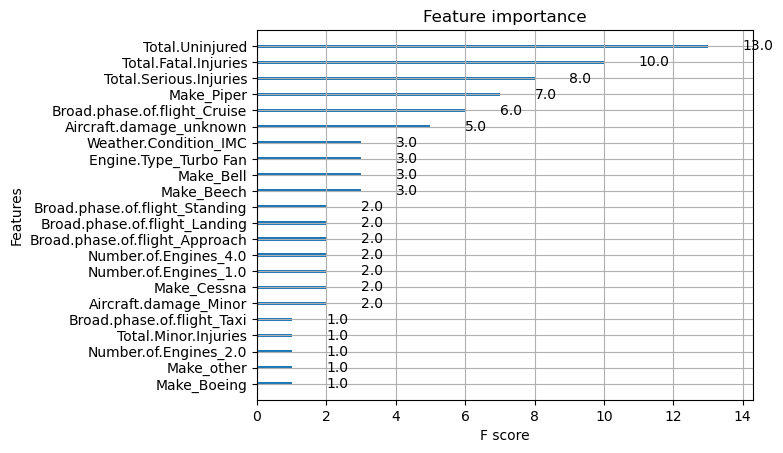

In [19]:
xgb.plot_importance(xg_reg)